# Complex Systems Project #
### Antibiotic Resistance in Bacteria
##### by Maryna Borovyk and Illia Pastushok

In [36]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [37]:
params = {
    'gS': 1.0,          # Growth rate of sensitive bacteria (1/h)
    'gR': 0.65,         # Growth rate of resistant bacteria (1/h)
    'K': 1e9,           # Carrying capacity (cells)
    'lambda': 0.7,      # Conjugation rate (1/h)
    'p': 0.5,           # Probability of plasmid loss
    'd': 0.5,           # Natural death rate (1/h)
    'ES_max': 1.5,      # Max kill rate for sensitive bacteria (1/h)
    'ER_max': 1.1,      # Max kill rate for resistant bacteria (1/h)
    'AS_50': 0.25,      # Half-max effect concentration (sensitive) (μg/ml)
    'AR_50': 5.0,       # Half-max effect concentration (resistant) (μg/ml)
    'alpha': 0.15       # Antibiotic elimination rate (1/h)
}

K is max number of bacterias
there might nbe a condition hidden in equation
max population can be as y lim K
try simpler equation without horizontal


In [38]:
# Define the sigmoid function for the killing rate
def mu_i(Emax, A, A50):
    return Emax * A / (A50 + A)

# Define the antibiotic concentration function with multiple doses
# Define the antibiotic concentration function with multiple doses
def A_t(t, A0, alpha, tau):
    if tau == -1:
        return A0 * np.exp(-alpha * t)
    else:
        i = int(t // tau)
        if t == i * tau:
            return sum(A0 * np.exp(-j * alpha * tau) for j in range(i + 1))
        else:
            return sum(A0 * np.exp(-j * alpha * tau) for j in range(i)) * np.exp(-alpha * (t - (i - 1) * tau))


# Differential equations for the model
def model(y, t, params):
    S, R = y  # Sensitive and Resistant bacteria
    A = A_t(t, 0, params['alpha'], params['tau'])  # Antibiotic concentration
    mu_S = mu_i(params['ES_max'], A, params['AS_50'])
    mu_R = mu_i(params['ER_max'], A, params['AR_50'])

    # dS/dt and dR/dt
    dSdt = params['gS'] * (1 - (S + R) / params['K']) * S \
           - (params['lambda'] * S * R / (S + R))  \
           + params['p'] * params['gR'] * R \
           - (mu_S + params['d']) * S

    dRdt = params['gR'] * (1 - (S + R) / params['K']) * R \
           + (params['lambda'] * S * R / (S + R)) \
           - params['p'] * params['gR'] * R \
          - (mu_R + params['d']) * R

    return [dSdt, dRdt]


In [39]:
# Initial conditions
S0 = 1e3   # Initial sensitive bacteria
R0 = 1e3   # Initial resistant bacteria
initial_conditions = [S0, R0]

# Time span for the simulation (e.g., 0 to 120 hours)
time = np.linspace(0, 120, 500)

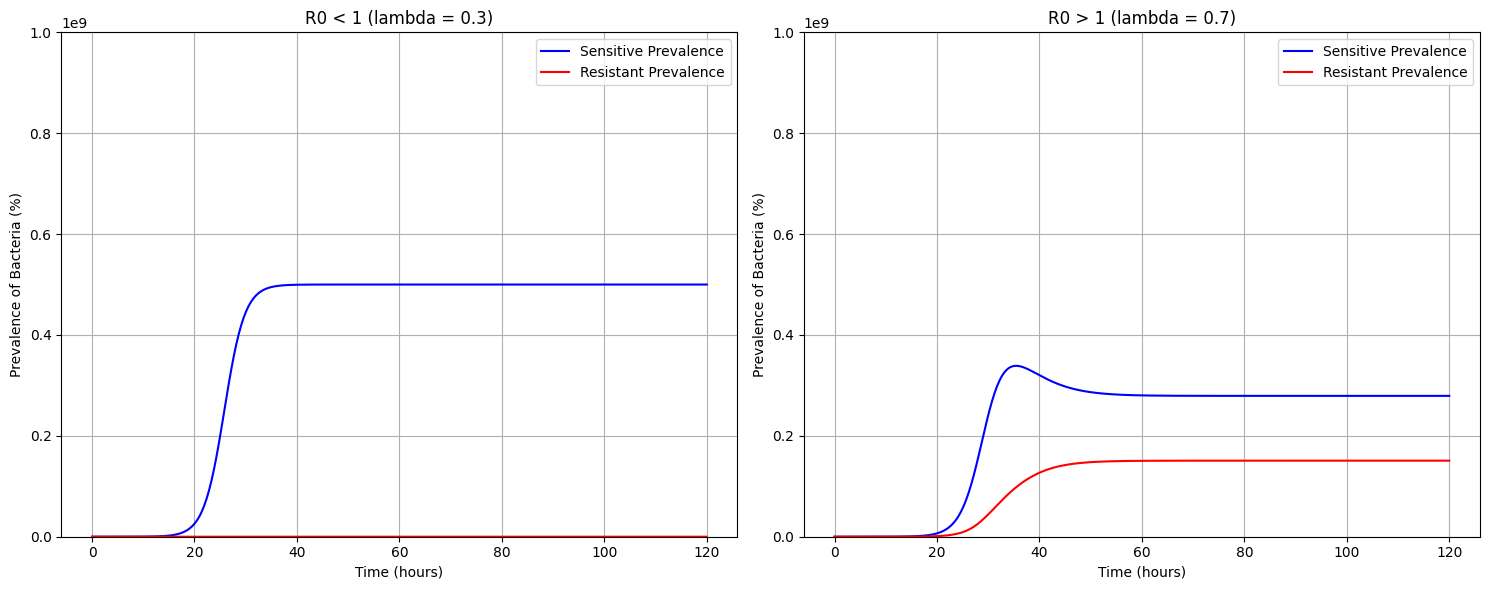

In [40]:
# --- Recreate Figure 2 ---
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

K = 1e9  # Define your K parameter
params['A0'] = 0  # Initial dose (μg/ml)
params['tau'] = -1  # No repeated doses

# 2a: R0 < 1 (lambda = 0.3)
params['lambda'] = 0.3
solution = odeint(model, initial_conditions, time, args=(params,))
S, R = solution[:, 0], solution[:, 1]
axes[0].plot(time, S , label="Sensitive Prevalence", color="blue")
axes[0].plot(time, R , label="Resistant Prevalence", color="red")
axes[0].set_ylim(0, K)  # Set y-axis limit
axes[0].set_title("R0 < 1 (lambda = 0.3)")
axes[0].set_xlabel("Time (hours)")
axes[0].set_ylabel("Prevalence of Bacteria (%)")
axes[0].legend()
axes[0].grid()

# 2b: R0 > 1 (lambda = 0.7)
params['lambda'] = 0.7
solution = odeint(model, initial_conditions, time, args=(params,))
S, R = solution[:, 0], solution[:, 1]
axes[1].plot(time, S , label="Sensitive Prevalence", color="blue")
axes[1].plot(time, R , label="Resistant Prevalence", color="red")
axes[1].set_ylim(0, K)  # Set y-axis limit
axes[1].set_title("R0 > 1 (lambda = 0.7)")
axes[1].set_xlabel("Time (hours)")
axes[1].set_ylabel("Prevalence of Bacteria (%)")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

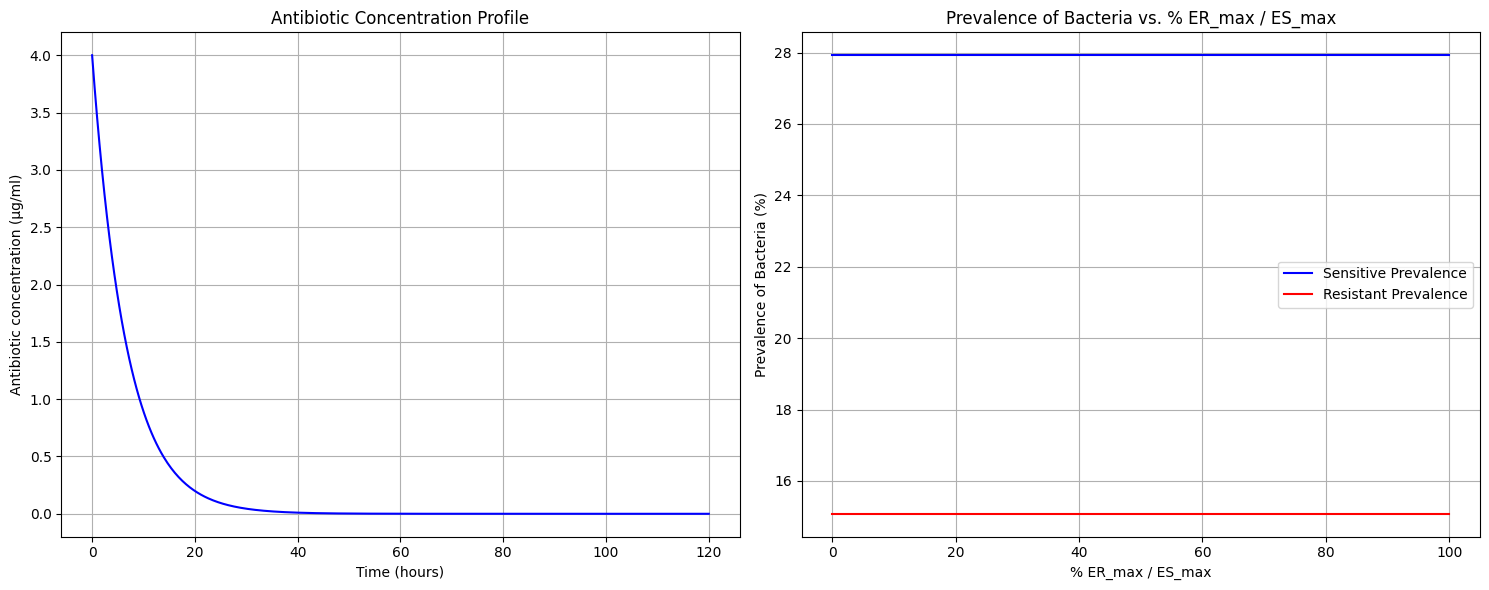

In [ ]:
# --- Recreate Figure 4 ---
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 4a: Antibiotic concentration profile
A0 = 4  # Initial dose (μg/ml)
tau = -1  # Period for administering antibiotic doses
antibiotic_levels = [A_t(t, A0, params['alpha'], tau) for t in time]

axes[0].plot(time, antibiotic_levels, color="blue")
axes[0].set_title("Antibiotic Concentration Profile")
axes[0].set_xlabel("Time (hours)")
axes[0].set_ylabel("Antibiotic concentration (μg/ml)")
axes[0].grid()

# 4b: Ratio of kill rates vs. varying antibiotic concentration ratios
sensitive_kill_rates = []
resistant_kill_rates = []
concentration_ratios = np.linspace(0.01, 100, 500)  # AR_50 / AS_50 ratio

for ratio in concentration_ratios:
    AS = params['AS_50'] * ratio  # Adjust antibiotic efficacy for sensitive bacteria
    kill_S = params['ES_max'] / (1 + AS / params['AS_50'])
    kill_R = params['ER_max'] / (1 + AS / params['AR_50'])
    sensitive_kill_rates.append(kill_S)
    resistant_kill_rates.append(kill_R)

axes[1].plot(concentration_ratios, sensitive_kill_rates, label="Sensitive", color="blue")
axes[1].plot(concentration_ratios, resistant_kill_rates, label="Resistant", color="red")
axes[1].set_title("Kill Rate Ratios")
axes[1].set_xlabel("% Effectiveness Ratio (AS_50 / AR_50)")
axes[1].set_ylabel("Kill rate (1/h)")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

RuntimeError: The size of the array returned by func (4) does not match the size of y0 (2).

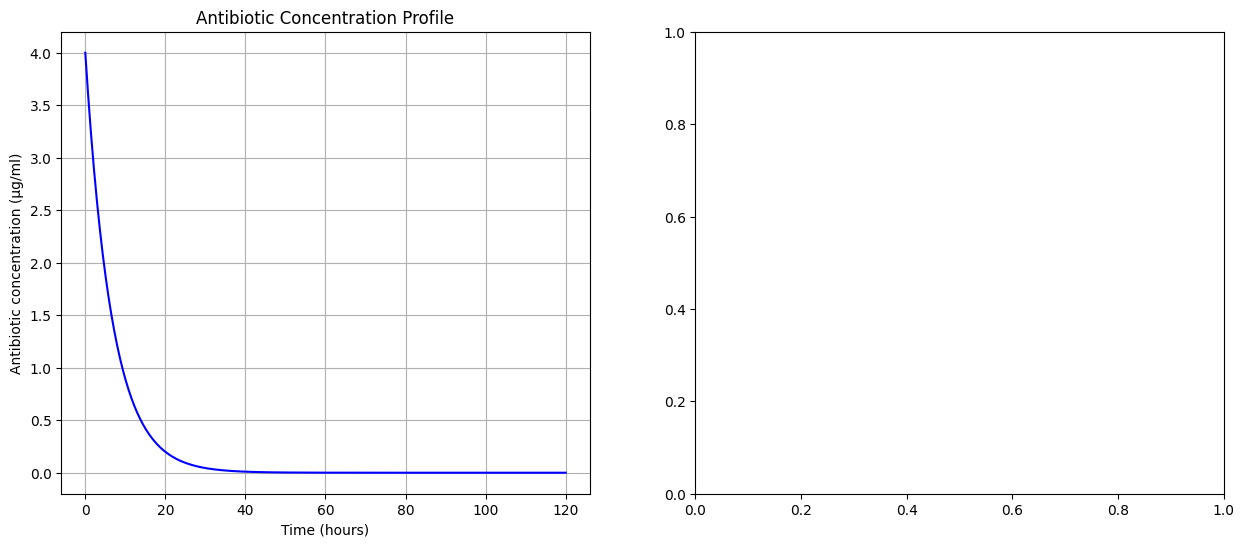

In [52]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define parameters
params = {
    'gS': 1.0,          # Growth rate of sensitive bacteria (1/h)
    'gR': 0.65,         # Growth rate of resistant bacteria (1/h)
    'K': 1e9,           # Carrying capacity (cells)
    'lambda': 0.7,      # Conjugation rate (1/h)
    'p': 0.5,           # Probability of plasmid loss
    'd': 0.5,           # Natural death rate (1/h)
    'ES_max': 1.5,      # Max kill rate for sensitive bacteria (1/h)
    'ER_max': 1.1,      # Max kill rate for resistant bacteria (1/h)
    'AS_50': 0.25,      # Half-max effect concentration (sensitive) (μg/ml)
    'AR_50': 5.0,       # Half-max effect concentration (resistant) (μg/ml)
    'alpha': 0.15,      # Antibiotic elimination rate (1/h)
    'A0': 4,            # Initial dose (μg/ml)
    'tau': -1           # No repeated doses
}

# Define the sigmoid function for the killing rate
def mu_i(Emax, A, A50):
    return Emax * A / (A50 + A)

# Define the antibiotic concentration function with multiple doses
def A_t(t, A0, alpha, tau):
    if tau == -1:
        return A0 * np.exp(-alpha * t)
    else:
        i = int(t // tau)
        if t == i * tau:
            return sum(A0 * np.exp(-j * alpha * tau) for j in range(i + 1))
        else:
            return sum(A0 * np.exp(-j * alpha * tau) for j in range(i)) * np.exp(-alpha * (t - (i - 1) * tau))

# Differential equations for the model
def model(y, t, params):
    S, R = y  # Sensitive and Resistant bacteria
    A = A_t(t, params['A0'], params['alpha'], params['tau'])  # Antibiotic concentration
    mu_S = mu_i(params['ES_max'], A, params['AS_50'])
    mu_R = mu_i(params['ER_max'], A, params['AR_50'])

    # dS/dt and dR/dt
    dSdt = params['gS'] * (1 - (S + R) / params['K']) * S \
           - (params['lambda'] * S * R / (S + R))  \
           + params['p'] * params['gR'] * R \
           - (mu_S + params['d']) * S

    dRdt = params['gR'] * (1 - (S + R) / params['K']) * R \
           + (params['lambda'] * S * R / (S + R)) \
           - params['p'] * params['gR'] * R \
           - (mu_R + params['d']) * R
    return [dSdt, dRdt]

# Initial conditions
S0 = 1e3   # Initial sensitive bacteria
R0 = 1e3   # Initial resistant bacteria
initial_conditions = [S0, R0]  # Original initial conditions

# Time span for the simulation (e.g., 0 to 120 hours)
time = np.linspace(0, 120, 500)

# --- Recreate Figure 4 ---
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 4a: Antibiotic concentration profile
antibiotic_levels = [A_t(t, params['A0'], params['alpha'], params['tau']) for t in time]

axes[0].plot(time, antibiotic_levels, color="blue")
axes[0].set_title("Antibiotic Concentration Profile")
axes[0].set_xlabel("Time (hours)")
axes[0].set_ylabel("Antibiotic concentration (μg/ml)")
axes[0].grid()

# 4b: Ratio of kill rates vs. prevalence of bacteria
prevalence_sensitive = []
prevalence_resistant = []
mu_s_plot = []
mu_r_plot = []
ratios = np.linspace(0.01, 100, 500)  # ER_max / ES_max ratio

solution = odeint(model, initial_conditions, time, args=(params,))
S, R = solution[:, 0], solution[:, 1]

for t in time:
    A = A_t(t, params['A0'], params['alpha'], params['tau'])
    mu_s = mu_i(params['ES_max'], A, params['AS_50'])
    mu_r = mu_i(params['ER_max'], A, params['AR_50'])
    prevalence_sensitive.append(S[-1] / params['K'] * 100)  # Convert to percentage
    prevalence_resistant.append(R[-1] / params['K'] * 100)  # Convert to percentage
    mu_s_plot.append(mu_s/params['ES_max']*100)
    mu_r_plot.append(mu_r/params['ER_max']*100)

axes[1].plot(mu_s_plot, prevalence_sensitive, label="Sensitive Prevalence", color="blue")
axes[1].plot(mu_r_plot, prevalence_resistant, label="Resistant Prevalence", color="red")
axes[1].set_title("Prevalence of Bacteria vs. % ER_max / ES_max")
axes[1].set_xlabel("% ER_max / ES_max")
axes[1].set_ylabel("Prevalence of Bacteria (%)")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()